In [52]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import pickle

from scipy import signal

%matplotlib inline

In [53]:
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

### wav file load by librosa

In [54]:
data_by_librosa = librosa.core.load('../data/input/train/audio/bed/0a7c2a8d_nohash_0.wav',sr=16000)[0]
#plot_time_series(data_by_librosa)
#ipd.Audio(data_by_librosa, rate=16000)

### wav file load by scipy wavfile

In [55]:
data_by_wavfile = wavfile.read('../data/input/train/audio/bed/0a7c2a8d_nohash_0.wav')[1]
#plot_time_series(data_by_wavfile)
#ipd.Audio(data_by_wavfile, rate=16000)

In [56]:
freqs, times, spec = signal.spectrogram(data_by_librosa, 16000)
min(spec.reshape(-1,1)),max(spec.reshape(-1,1))
spec = np.log(spec.T.astype(np.float32))
min(spec.reshape(-1,1)),max(spec.reshape(-1,1))

(array([-42.86334229], dtype=float32), array([-9.09477425], dtype=float32))

In [ ]:
# spec = np.log(spec.T.astype(np.float32))

fig = plt.figure(figsize=(14, 8))
ax2 = fig.add_subplot(111)
ax2.imshow(
    spec.T,
    aspect='auto',
    origin='lower', 
    extent=[times.min(), times.max(), freqs.min(), freqs.max()]
)
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [33]:
freqs, times, spec = signal.spectrogram(data_by_wavfile, 16000)

Text(0.5,0,'Seconds')

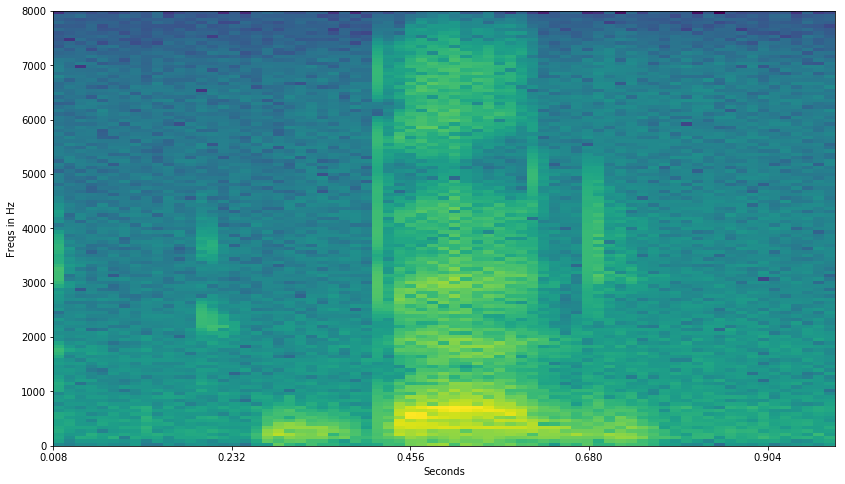

In [34]:
spec = np.log(spec.T.astype(np.float32))

fig = plt.figure(figsize=(14, 8))
ax2 = fig.add_subplot(111)
ax2.imshow(
    spec.T,
    aspect='auto',
    origin='lower', 
    extent=[times.min(), times.max(), freqs.min(), freqs.max()]
)
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')